In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ipyleaflet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 4.5 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 1.6 MB 47.4 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
import plotly.express as px
import scipy
from tqdm import tqdm
import re
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import skew
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import word2vec
import nltk
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
from geopy import distance
import pandas as pd
#from ipyleaflet import Map, basemaps, basemap_to_tiles
import ipywidgets
from vega_datasets import data as vds
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/zomato.csv')

NameError: ignored

In [ ]:
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [ ]:
data.drop(['phone','menu_item'],axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   location                     51696 non-null  object
 8   rest_type                    51490 non-null  object
 9   dish_liked                   23639 non-null  object
 10  cuisines                     51672 non-null  object
 11  approx_cost(for two people)  51371 non-null  object
 12  reviews_list                 51717 non-null  object
 13  listed_in(type)              51

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum(),data.isna().sum()

(0, url                                0
 address                            0
 name                               0
 online_order                       0
 book_table                         0
 rate                            7775
 votes                              0
 location                          21
 rest_type                        227
 dish_liked                     28078
 cuisines                          45
 approx_cost(for two people)      346
 reviews_list                       0
 listed_in(type)                    0
 listed_in(city)                    0
 dtype: int64)

In [ ]:
data.rename(columns={'approx_cost(for two people)':'Cost_for_two','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)
data['Cost_for_two']= data['Cost_for_two'].str.replace(',','').astype('float64')
data.drop(data[data['rate']=='NEW'].index,inplace=True)
data.drop(data[data['rate']=='NaN'].index,inplace=True)
data.drop(data[data['rate']=='-'].index,inplace=True)
#data['rate']=data['rate'].apply(lambda x: x.replace('/5',''))
data['rate'] = data['rate'].str.replace('/5','')
data['rate'].dropna(axis=0,how='any',inplace=True)
data['rate'] = data['rate'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49440 entries, 0 to 51716
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           49440 non-null  object 
 1   address       49440 non-null  object 
 2   name          49440 non-null  object 
 3   online_order  49440 non-null  object 
 4   book_table    49440 non-null  object 
 5   rate          41665 non-null  float64
 6   votes         49440 non-null  int64  
 7   location      49419 non-null  object 
 8   rest_type     49215 non-null  object 
 9   dish_liked    23492 non-null  object 
 10  cuisines      49395 non-null  object 
 11  Cost_for_two  49099 non-null  float64
 12  reviews_list  49440 non-null  object 
 13  type          49440 non-null  object 
 14  city          49440 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 6.0+ MB


In [ ]:
#Imputing the missing values with means and this step should be performed earlier!!!
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
data['rate'] = mean_imputer.fit_transform(data['rate'].values.reshape(-1,1))
data['rate'].unique()

array([4.1       , 3.8       , 3.7       , 3.6       , 4.6       ,
       4.        , 4.2       , 3.9       , 3.1       , 3.        ,
       3.2       , 3.3       , 2.8       , 4.4       , 4.3       ,
       2.9       , 3.5       , 3.70044882, 2.6       , 3.4       ,
       4.5       , 2.5       , 2.7       , 4.7       , 2.4       ,
       2.2       , 2.3       , 4.8       , 4.9       , 2.1       ,
       2.        , 1.8       ])

In [ ]:
data.describe()

rate         votes  Cost_for_two
count  49440.000000  49440.000000  49099.000000
mean       3.700449    296.763451    561.224567
std        0.404393    819.779986    443.454428
min        1.800000      0.000000     40.000000
25%        3.500000      9.000000    300.000000
50%        3.700449     47.000000    400.000000
75%        4.000000    212.000000    700.000000
max        4.900000  16832.000000   6000.000000

In [ ]:
outliers  = px.box(data['votes'])
outliers1 = px.box(data['rate'])
costfortwoOL = px.box(data['Cost_for_two'])
outliers1.show(),outliers.show(),costfortwoOL.show(),skew(data['Cost_for_two'])

(None, None, None, nan)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



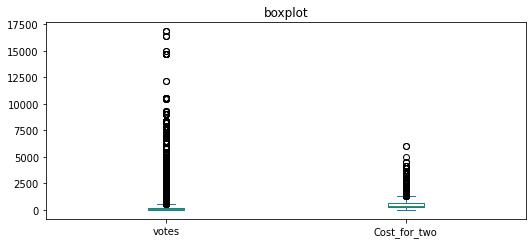

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = data[['votes','Cost_for_two']].plot(kind='box',title='boxplot')
plt.show()

In [ ]:
histogram = px.histogram(data['Cost_for_two'])
histogram.show()
'''plt.hist(data['Cost_for_two'],bins=50,align='mid')
plt.ylim(0,6000)
plt.xlim(0,8000)
plt.show()'''

"plt.hist(data['Cost_for_two'],bins=50,align='mid')\nplt.ylim(0,6000)\nplt.xlim(0,8000)\nplt.show()"

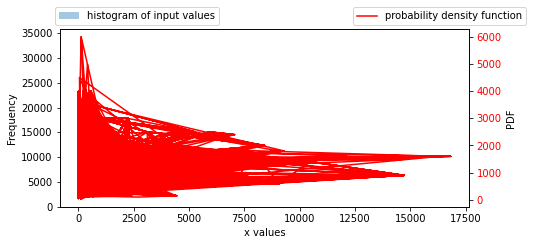

In [ ]:
def plotHistogramAndPdf(data, x, pdf):
    ax = plt.gca()
    plt.hist(data, bins = 4, alpha = 0.4, label = 'histogram of input values');
    plt.ylabel('Frequency')
    plt.xlabel('x values')
    ax2 = ax.twinx()
    plt.plot(x, pdf, c = 'red', label = 'probability density function');
    plt.ylabel('PDF')
    [tl.set_color('r') for tl in ax2.get_yticklabels()]
    ax.legend(bbox_to_anchor=(0.4, 1.15))
    ax2.legend(bbox_to_anchor=(1.15,1.15))

plotHistogramAndPdf(data['rate'], data['votes'], data['Cost_for_two'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



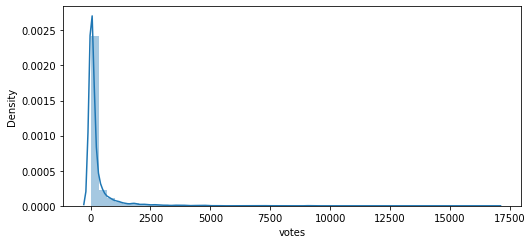

In [ ]:
sns.distplot(data.votes)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



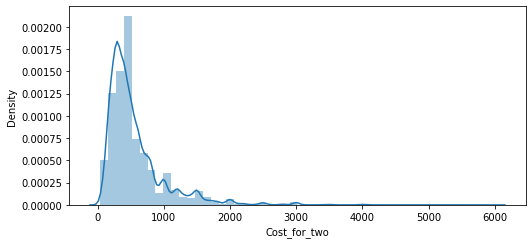

In [ ]:
sns.distplot(data.Cost_for_two)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



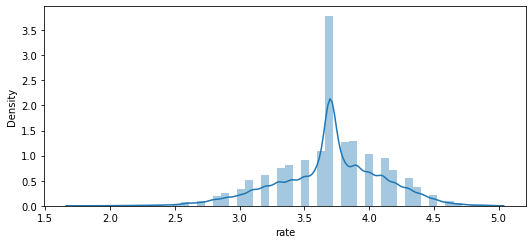

In [ ]:
sns.distplot(data.rate)

In [ ]:
#Session is crashing dont RUN
'''
fitted_data, fitted_lambda = stats.boxcox(k)
fig, ax  = plt.subplots(1,2)
sns.histplot(k,ax=ax[0])
sns.histplot(fitted_data,ax=ax[1])
plt.legend(loc="upper right")
fig.set_figheight(5)
fig.set_figwidth(10) '''

'\nfitted_data, fitted_lambda = stats.boxcox(k)\nfig, ax  = plt.subplots(1,2)\nsns.histplot(k,ax=ax[0])\nsns.histplot(fitted_data,ax=ax[1])\nplt.legend(loc="upper right")\nfig.set_figheight(5)\nfig.set_figwidth(10) '

In [ ]:
cov = data.cov()

In [ ]:
#taking new dataframe for numerial cols to find the covaariance
covtest = data[['rate','votes','Cost_for_two']]
#finding covaraince
covar_num = covtest.cov()
covar_num

rate          votes   Cost_for_two
rate            0.163534     142.085685      66.475950
votes         142.085685  672039.225845  139386.107146
Cost_for_two   66.475950  139386.107146  196651.829768

In [ ]:
pf_rating_review=[]
for review,name,restaurant_type,type1 in tqdm(zip(data.reviews_list,data.name,data.rest_type,data.type)):
  ratings1= eval(review)
  for ratings2,review1 in ratings1:
    if ratings2 is not None:
      ratings2 = ratings2.strip("Rated").strip()
      review1  = review1.strip("RATED\n").strip()
      ratings2 = float(ratings2)
      pf_rating_review.append([name,ratings2,type1,review1])
pf_rating_review[0]

49440it [00:20, 2419.36it/s]


['Jalsa',
 4.0,
 'Buffet',
 'A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.']

In [ ]:
pf_rating_review = pd.DataFrame(pf_rating_review,columns=['Restaurant_Name','Rating','Dining_Type','Review'])
pf_rating_review['Review']=tqdm(pf_rating_review['Review'].apply(lambda A : re.sub('[^a-zA-Z0-9\s]',"",A)))
pf_rating_review

100%|██████████| 1314022/1314022 [00:00<00:00, 2496284.94it/s]


Restaurant_Name  Rating  \
0                                                    Jalsa     4.0   
1                                                    Jalsa     4.0   
2                                                    Jalsa     2.0   
3                                                    Jalsa     4.0   
4                                                    Jalsa     5.0   
...                                                    ...     ...   
1314017  Chime - Sheraton Grand Bengaluru Whitefield Ho...     5.0   
1314018  Chime - Sheraton Grand Bengaluru Whitefield Ho...     5.0   
1314019  Chime - Sheraton Grand Bengaluru Whitefield Ho...     4.0   
1314020                       The Nest - The Den Bengaluru     5.0   
1314021                       The Nest - The Den Bengaluru     5.0   

           Dining_Type                                             Review  
0               Buffet  A beautiful place to dine inThe interiors take...  
1               Buffet  I was here for dinner with my family on a week...  
2               Buffet  Its a restaurant near to Banashankari BDA Me a...  
3               Buffet  We went here on a weekend and one of us had th...  
4               Buffet  The best thing about the place is its ambiance...  
...                ...                                                ...  
1314017  Pubs and bars  My review based on food drink service\n\nFood ...  
1314018  Pubs and bars  I visited chime bar at Sheraton hotel it was n...  
1314019  Pubs and bars  This restaurant is situated inside grand Shera...  
1314020  Pubs and bars  Great ambience  looking nice good selection of...  
1314021  Pubs and bars  The nest is one of the best bar in WhitefieldT...  

[1314022 rows x 4 columns]

In [ ]:
#Occurance of name Jalsa in dataset (in name column)
data.name.str.count('Jalsa').sum()

16

In [ ]:
names=data.columns
for i in range(len(names)):
  print(str(i)+". "+names[i])

0. url
1. address
2. name
3. online_order
4. book_table
5. rate
6. votes
7. location
8. rest_type
9. dish_liked
10. cuisines
11. Cost_for_two
12. reviews_list
13. type
14. city


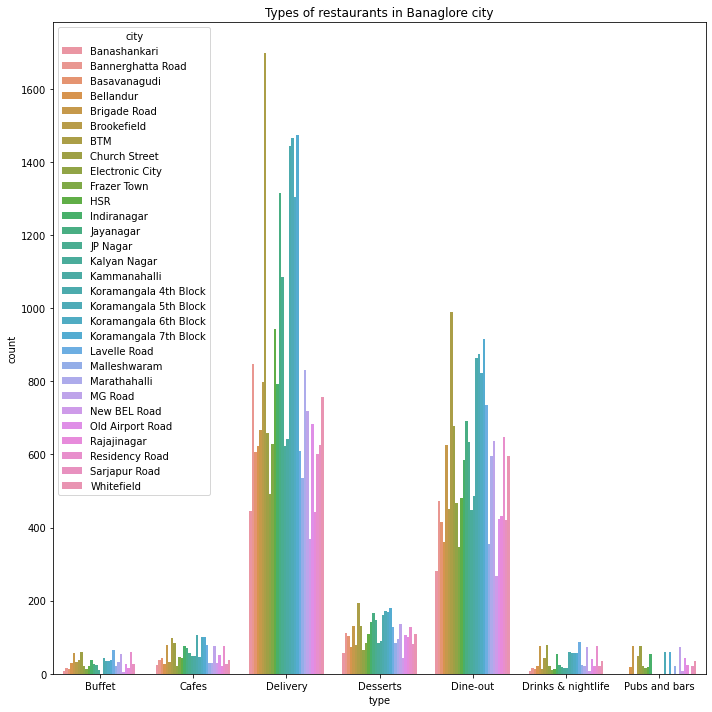

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.countplot(x='type',hue='city',data=data)
plt.title("Types of restaurants in Banaglore city")
plt.show(ax)

In [ ]:
count_of_rest_types={}
for variety in data.rest_type.dropna():
  if(',' in variety):
    k=variety.split(', ')
    for i in k:
      if i not in count_of_rest_types:
        count_of_rest_types[i]=1
      else:
        count_of_rest_types[i]+=1
  else:
    if variety not in count_of_rest_types:
      count_of_rest_types[variety]=1
    else:
      count_of_rest_types[variety]+=1
count_of_rest_types

{'Casual Dining': 12707,
 'Cafe': 4910,
 'Quick Bites': 19485,
 'Delivery': 4350,
 'Mess': 260,
 'Dessert Parlor': 3095,
 'Bakery': 1920,
 'Pub': 912,
 'Takeaway': 1966,
 'Fine Dining': 405,
 'Beverage Shop': 1404,
 'Sweet Shop': 739,
 'Bar': 2379,
 'Confectionery': 47,
 'Kiosk': 190,
 'Food Truck': 82,
 'Microbrewery': 375,
 'Lounge': 540,
 'Food Court': 736,
 'Dhaba': 33,
 'Club': 41,
 'Irani Cafee': 15,
 'Bhojanalya': 3,
 'Pop Up': 2,
 'Meat Shop': 4}

Text(0.5, 1.0, 'Top 20 restaurants in Bangalore')

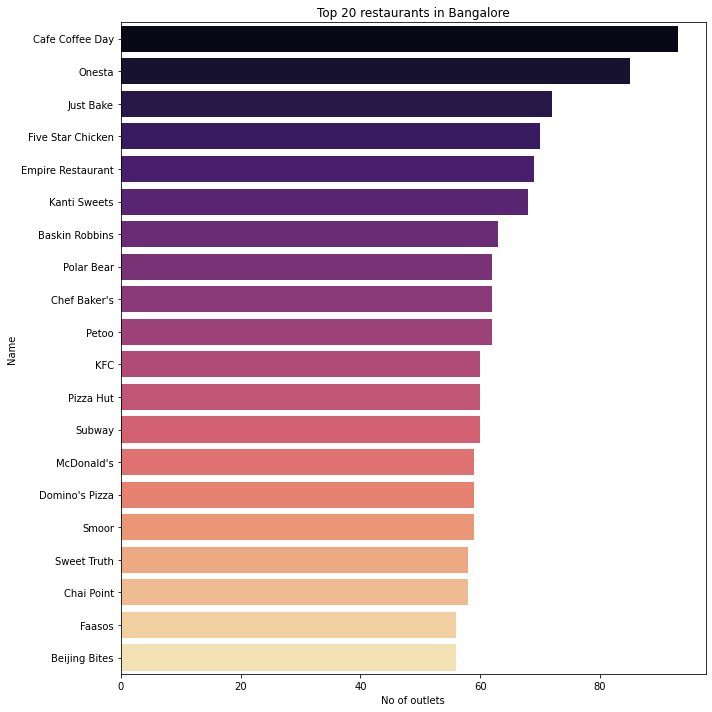

In [ ]:
#Top restaurants in banagaore
x = data["name"].value_counts()[:20]
plt.figure(figsize=(10,10))
sns.barplot(x=x,y=x.index,palette='magma')
plt.xlabel("No of outlets")
plt.ylabel("Name")
plt.title("Top 20 restaurants in Bangalore")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

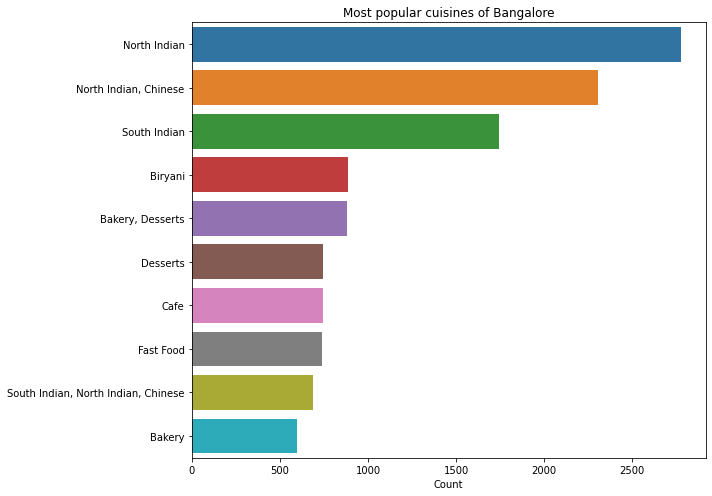

In [ ]:
#Popular cuisines in bangalore
plt.figure(figsize=(10,7))
cuisines=data['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

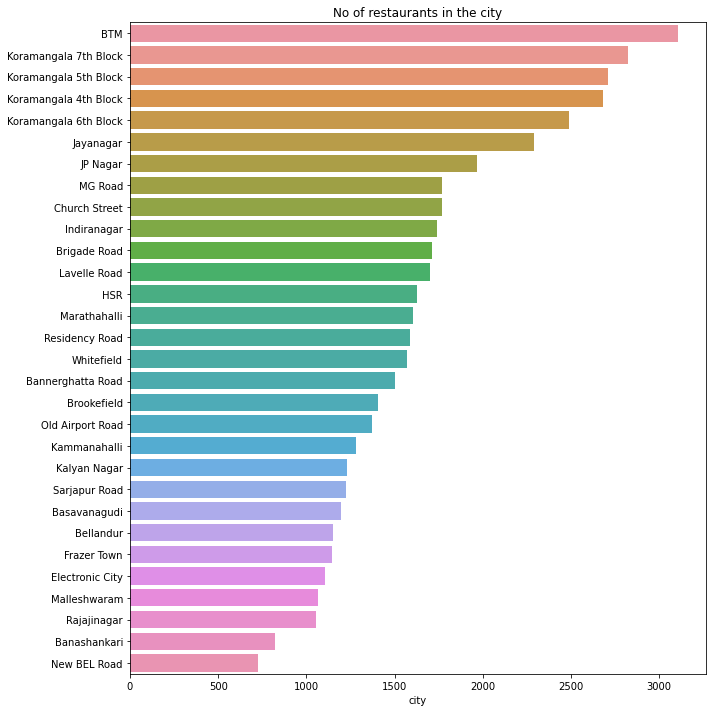

In [ ]:
#No of restaurants in the city
plt.figure(figsize=(10,10))
y = data['city'].value_counts()
bx=sns.barplot(y=y.index,x=y,data=data)
plt.title("No of restaurants in the city")
plt.show(bx)


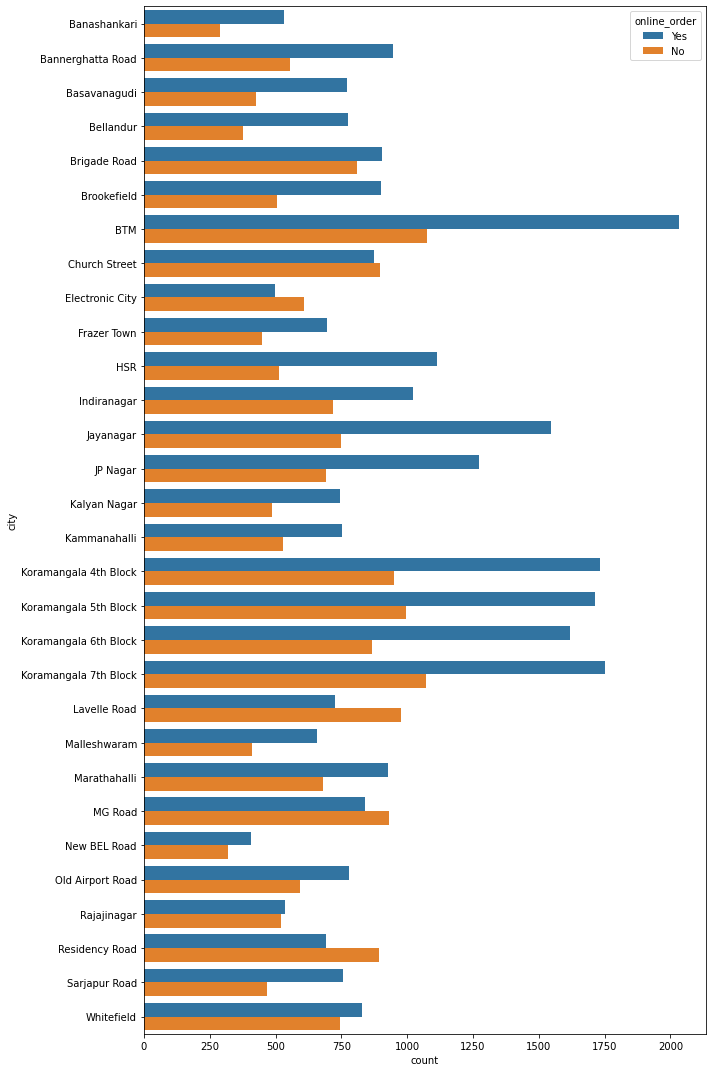

In [ ]:
plt.figure(figsize=(10,15))
cx = sns.countplot(y='city',hue='online_order',data=data)
plt.show(cx)

In [ ]:
data.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes      location            rest_type  \
0          Yes        Yes   4.1    775  Banashankari        Casual Dining   
1          Yes         No   4.1    787  Banashankari        Casual Dining   
2          Yes         No   3.8    918  Banashankari  Cafe, Casual Dining   
3           No         No   3.7     88  Banashankari          Quick Bites   
4           No         No   3.8    166  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  Cost_for_two  \
0  North Indian, Mughlai, Chinese         800.0   
1     Chinese, North Indian, Thai         800.0   
2          Cafe, Mexican, Italian         800.0   
3      South Indian, North Indian         300.0   
4        North Indian, Rajasthani         600.0   

                                        reviews_list    type          city  
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...  Buffet  Banashankari  
1  [('Rated 4.0', 'RATED\n  Had been here for din...  Buffet  Banashankari  
2  [('Rated 3.0', "RATED\n  Ambience is not that ...  Buffet  Banashankari  
3  [('Rated 4.0', "RATED\n  Great food and proper...  Buffet  Banashankari  
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...  Buffet  Banashankari

In [ ]:
data['cuisines'].unique

<bound method Series.unique of 0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 49440, dtype: object>

In [ ]:
data[data.cuisines=='Finger Food'][['cuisines','location','address']]

cuisines                    location  \
561    Finger Food                Banashankari   
855    Finger Food                Banashankari   
3310   Finger Food                Basavanagudi   
3485   Finger Food                Banashankari   
3545   Finger Food                   Jayanagar   
...            ...                         ...   
51707  Finger Food                  Whitefield   
51710  Finger Food                  Whitefield   
51713  Finger Food                  Whitefield   
51714  Finger Food                  Whitefield   
51715  Finger Food  ITPL Main Road, Whitefield   

                                                 address  
561    1431, 22nd Cross, Near BDA Complex, 2nd Stage,...  
855    1431, 22nd Cross, Near BDA Complex, 2nd Stage,...  
3310   Springs Hotel & Spa, 19, H. Siddaiah Road, Off...  
3485   1431, 22nd Cross, Near BDA Complex, 2nd Stage,...  
3545   The Royal Comfort, 453/2/16, 27th Cross, 4th B...  
...                                                  ...  
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...  
51710  2E2, 4th Cross Road, Devasandra Industrial Est...  
51713  Number 10, Garudachar Palya, Mahadevapura, Whi...  
51714  Sheraton Grand Bengaluru Whitefield Hotel & Co...  
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...  

[269 rows x 3 columns]

In [ ]:
data_1=data.groupby(['location','cuisines']).agg('count')
data_2=data_1.sort_values(['url'],ascending=False).groupby(['location'],as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [ ]:
locations=pd.DataFrame({"Name":data_2['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [ ]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

Name                                  geo_loc
0                BTM  (12.911275849999999, 77.60456543431182)
1       Banashankari        (12.965283249999999, 77.59445195)
2          Banaswadi                 (13.0141618, 77.6518539)
3  Bannerghatta Road                 (12.8545439, 77.5886892)
4       Basavanagudi                 (12.9417261, 77.5755021)

In [ ]:
Rest_locations=pd.DataFrame(data_2['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

3

In [ ]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [ ]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [ ]:
basemap

**North Cuisines**

In [ ]:
def cuisine_types(col,name):
    data3= pd.DataFrame(data[data[col]==name].groupby(['location'],as_index=False)['url'].agg('count'))
    data3.columns=['Name','count']
    print(data3.head())
    data3=data3.merge(locations,on="Name",how='left').dropna()
    data3['lan'],data3['lon']=zip(*data3['geo_loc'].values)
    return data3.drop(['geo_loc'],axis=1)

In [ ]:
North_India=cuisine_types('cuisines','North Indian')

                Name  count
0                BTM    319
1       Banashankari     28
2          Banaswadi     12
3  Bannerghatta Road     72
4       Basavanagudi     20


In [ ]:
basemap=generateBaseMap()
HeatMap(North_India[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

**South Cuisines**

In [ ]:
south_indian=cuisine_types('cuisines','South Indian')
basemap=generateBaseMap()
HeatMap(south_indian[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

                Name  count
0                BTM    106
1       Banashankari     81
2          Banaswadi     37
3  Bannerghatta Road     44
4       Basavanagudi     87


In [ ]:
data['dish_liked']=data['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])

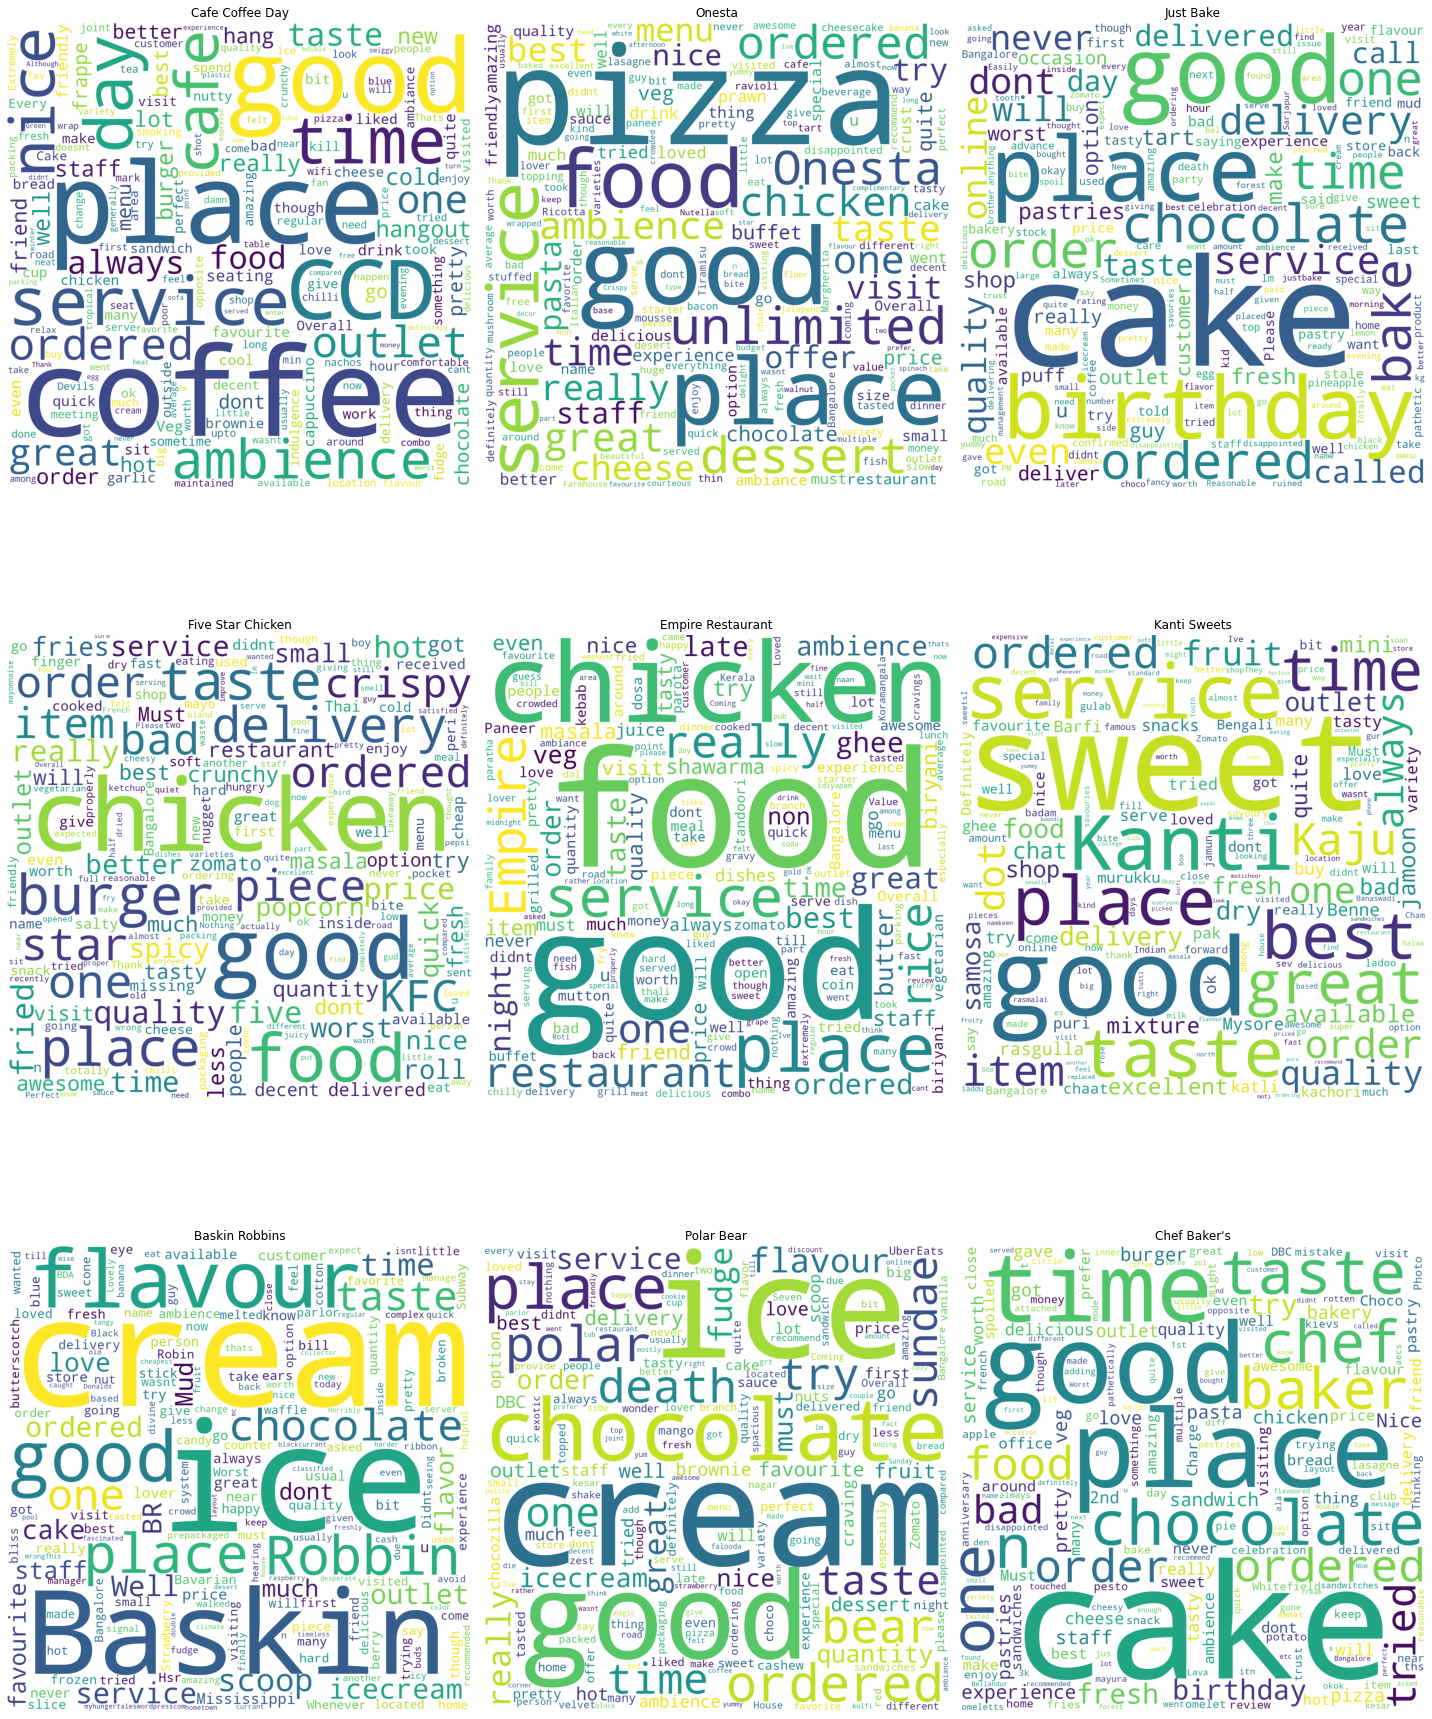

In [ ]:
rest=data['name'].value_counts()[:9].index
def produce_wordcloud(rest):

    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=pf_rating_review[pf_rating_review['Restaurant_Name']==r]['Review'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")




produce_wordcloud(rest)

**Topic Modelling**

In [ ]:
pf_rating_review['sent']=pf_rating_review['Rating'].apply(lambda x: 1 if int(x)>2.5 else 0)

In [ ]:
stops=stopwords.words('english')
lemmatization=WordNetLemmatizer()
corpus=' '.join(lemmatization.lemmatize(x) for x in pf_rating_review[pf_rating_review['sent']==1]['Review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
zomato_real = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/zomato.csv')

In [ ]:
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

In [ ]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info() #.info() function is used to get a concise summary of the dataframe
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0
for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)
zomato.sample(3)
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [ ]:


## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))
zomato[['reviews_list', 'cuisines']].sample(5)



reviews_list  \
3106   rated 40 ratedn  a decent food had masala dosa...   
26231  rated 50 ratedn  for the first for a change i ...   
33871  rated 30 ratedn  i was visited this restaurant...   
5035   rated 20 ratedn  i visit mint masala when i ha...   
11729  rated 50 ratedn  haji ali at commercial street...   

                                               cuisines  
3106                South Indian, North Indian, Chinese  
26231                              Fast Food, Beverages  
33871  Continental, Chinese, North Indian, South Indian  
5035                              North Indian, Chinese  
11729        Fast Food, Pizza, Rolls, Beverages, Juices

In [ ]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

In [ ]:
## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

In [ ]:
zomato[['reviews_list', 'cuisines']].sample(5)

reviews_list  \
6663   rated 30 ratedn looking reviews images excited...   
9923   rated 50 ratedn natural ice cream st marks roa...   
32166  rated 40 ratedn fried rice gud taste yummyãx8...   
27069  rated 40 ratedn drew place put pictures drink ...   
31506  rated 10 ratedn food tastelessnot place visit ...   

                             cuisines  
6663           Cafe, Sandwich, Burger  
9923              Ice Cream, Desserts  
32166          Fast Food, Street Food  
27069  Beverages, Fast Food, Desserts  
31506                 Cafe, Beverages

In [ ]:
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]

In [ ]:
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [ ]:
df_percent.set_index('name', inplace=True)

In [ ]:
indices = pd.Series(df_percent.index)

In [ ]:
# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
def recommend(name, cosine_similarities = cosine_similarities):

    # Create a list to put top 10 restaurants
    recommend_restaurant = []

    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]

    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)

    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)

    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])

    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])

    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))

    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)

    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))

    return df_new

In [ ]:
df_percent[df_percent.index == 'Pai Vihar'].head()

address  online_order  \
name                                                                         
Pai Vihar  16/A, Ground Floor, Kkmp Building, Vasanth Nag...          True   
Pai Vihar  1106, OTC Road, Opposite City Corporation Offi...         False   
Pai Vihar  16/A, Ground Floor, Kkmp Building, Vasanth Nag...         False   
Pai Vihar  16/A, Ground Floor, Kkmp Building, Vasanth Nag...          True   
Pai Vihar  1106, OTC Road, Opposite City Corporation Offi...         False   

           book_table  rate  votes       location    rest_type  \
name                                                             
Pai Vihar       False   2.8     56  Vasanth Nagar  Quick Bites   
Pai Vihar       False   3.3     42    City Market  Quick Bites   
Pai Vihar       False   2.8     56  Vasanth Nagar  Quick Bites   
Pai Vihar       False   2.8     56  Vasanth Nagar  Quick Bites   
Pai Vihar       False   3.2     41    City Market  Quick Bites   

                                                cuisines   cost  \
name                                                              
Pai Vihar  South Indian, Street Food, Chinese, Fast Food  400.0   
Pai Vihar  South Indian, Street Food, Chinese, Fast Food  400.0   
Pai Vihar  South Indian, Street Food, Chinese, Fast Food  400.0   
Pai Vihar  South Indian, Street Food, Chinese, Fast Food  400.0   
Pai Vihar  South Indian, Street Food, Chinese, Fast Food  400.0   

                                                reviews_list  \
name                                                           
Pai Vihar  rated 30 ratedn 12 rate herenneven though tast...   
Pai Vihar  rated 20 ratedn food dry bland dont understand...   
Pai Vihar  rated 30 ratedn 12 rate hereãx83ãx83ãx82ãx...   
Pai Vihar  rated 30 ratedn 12 rate herenneven though tast...   
Pai Vihar  rated 20 ratedn food dry bland dont understand...   

                                                   menu_item      type  \
name                                                                     
Pai Vihar  ['Uddina Vada', 'Open Butter Masala Dosa', 'Ma...  Delivery   
Pai Vihar                                                 []  Dine-out   
Pai Vihar                                                 []  Delivery   
Pai Vihar                                                 []  Dine-out   
Pai Vihar                                                 []  Dine-out   

                     city  Mean Rating  
name                                    
Pai Vihar     Frazer Town         2.48  
Pai Vihar  Residency Road         2.48  
Pai Vihar  Residency Road         2.48  
Pai Vihar     Frazer Town         2.48  
Pai Vihar    Brigade Road         2.48

In [ ]:
recommend('Pai Vihar')

TOP 6 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


cuisines  Mean Rating  \
Shanthi Sagar                                    South Indian         3.44   
Shanthi Sagar     South Indian, North Indian, Chinese, Juices         3.44   
Shanthi Sagar             South Indian, North Indian, Chinese         3.44   
Mayura Sagar              Chinese, North Indian, South Indian         3.32   
The Diner              North Indian, Chinese, Andhra, Biryani         3.32   
Container Coffee                                 South Indian         3.11   

                   cost  
Shanthi Sagar     250.0  
Shanthi Sagar     250.0  
Shanthi Sagar     400.0  
Mayura Sagar      250.0  
The Diner         700.0  
Container Coffee  200.0